In [1]:
%matplotlib inline

# Essentials: Data Cleansing and ETL
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.legend_handler import HandlerLine2D

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_curve, auc # good for evaluation of binary classification problems
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('NFL09-17.csv', low_memory=False)
df.sample(10, random_state=27)

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
381377,2017-10-26,2017102600,20,3,4.0,03:33,4,1113.0,41.0,BAL,...,NaN,0.965280,0.034720,0.957667,0.042333,0.965280,-0.007612,NaN,NaN,2017
141318,2012-09-23,2012092304,23,4,NaN,11:24,12,684.0,0.0,CIN,...,NaN,0.221071,0.778929,0.220727,0.779273,0.221071,-0.000345,NaN,NaN,2012
88991,2011-01-02,2011010214,3,1,3.0,09:25,10,3265.0,28.0,ARI,...,0.361079,0.537793,0.462207,0.583425,0.416575,0.462207,-0.045632,-0.057193,0.011561,2010
208908,2013-11-24,2013112402,8,2,4.0,02:07,3,1927.0,46.0,TB,...,NaN,0.672109,0.327891,0.674017,0.325983,0.327891,-0.001908,NaN,NaN,2013
257021,2014-11-30,2014113003,10,2,4.0,11:05,12,2465.0,37.0,WAS,...,NaN,0.889110,0.110890,0.854501,0.145499,0.110890,0.034609,NaN,NaN,2014
406391,2017-12-31,2017123113,17,4,3.0,09:48,10,588.0,3.0,OAK,...,NaN,0.980601,0.019399,0.985459,0.014541,0.019399,-0.004858,NaN,NaN,2017
326764,2016-10-02,2016100202,26,4,NaN,03:36,4,216.0,5.0,OAK,...,0.000000,0.777316,0.222684,0.793963,0.206037,0.777316,0.016647,0.016647,0.000000,2016
220583,2013-12-22,2013122205,21,4,1.0,09:56,10,596.0,6.0,IND,...,NaN,0.051210,0.948790,0.053456,0.946544,0.948790,-0.002246,NaN,NaN,2013
99872,2011-10-02,2011100213,16,3,1.0,02:53,3,1073.0,6.0,MIA,...,NaN,0.856718,0.143282,0.846513,0.153487,0.856718,-0.010205,NaN,NaN,2011
169730,2012-12-09,2012120901,3,1,2.0,11:34,12,3394.0,31.0,KC,...,NaN,0.266557,0.733443,0.315789,0.684211,0.733443,-0.049232,NaN,NaN,2012


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407688 entries, 0 to 407687
Columns: 102 entries, Date to Season
dtypes: float64(33), int64(31), object(38)
memory usage: 317.3+ MB


In [4]:
df.shape

(407688, 102)

In [5]:
[col for col in df.columns]

['Date',
 'GameID',
 'Drive',
 'qtr',
 'down',
 'time',
 'TimeUnder',
 'TimeSecs',
 'PlayTimeDiff',
 'SideofField',
 'yrdln',
 'yrdline100',
 'ydstogo',
 'ydsnet',
 'GoalToGo',
 'FirstDown',
 'posteam',
 'DefensiveTeam',
 'desc',
 'PlayAttempted',
 'Yards.Gained',
 'sp',
 'Touchdown',
 'ExPointResult',
 'TwoPointConv',
 'DefTwoPoint',
 'Safety',
 'Onsidekick',
 'PuntResult',
 'PlayType',
 'Passer',
 'Passer_ID',
 'PassAttempt',
 'PassOutcome',
 'PassLength',
 'AirYards',
 'YardsAfterCatch',
 'QBHit',
 'PassLocation',
 'InterceptionThrown',
 'Interceptor',
 'Rusher',
 'Rusher_ID',
 'RushAttempt',
 'RunLocation',
 'RunGap',
 'Receiver',
 'Receiver_ID',
 'Reception',
 'ReturnResult',
 'Returner',
 'BlockingPlayer',
 'Tackler1',
 'Tackler2',
 'FieldGoalResult',
 'FieldGoalDistance',
 'Fumble',
 'RecFumbTeam',
 'RecFumbPlayer',
 'Sack',
 'Challenge.Replay',
 'ChalReplayResult',
 'Accepted.Penalty',
 'PenalizedTeam',
 'PenaltyType',
 'PenalizedPlayer',
 'Penalty.Yards',
 'PosTeamScore',
 'De

In [6]:
df['posteam'].unique()

array(['PIT', 'TEN', nan, 'CLE', 'MIN', 'NO', 'DET', 'DAL', 'TB', 'HOU',
       'NYJ', 'IND', 'JAC', 'DEN', 'CIN', 'CAR', 'PHI', 'KC', 'BAL',
       'ATL', 'MIA', 'ARI', 'SF', 'STL', 'SEA', 'NYG', 'WAS', 'GB', 'CHI',
       'NE', 'BUF', 'OAK', 'SD', 'LA', 'JAX', 'LAC'], dtype=object)

In [7]:
pd.set_option('max_colwidth',200)
df[df['PlayType']=='No Play']['desc'].sample(random_state=27)

264616    (12:58) (Shotgun) T.Romo sacked at PHI 38 for -8 yards (F.Cox). PENALTY on PHI-C.Williams, Illegal Contact, 5 yards, enforced at PHI 30 - No Play.
Name: desc, dtype: object

In [8]:
#We label a sack as a pass attempt, sack is essentially a pass attempt that was not performed successfully. 
#We don't consider a QB rush where the QB is sacked behind line of scrimmage
df['Pass_Sack'] = df['PassAttempt'] + df['Sack']

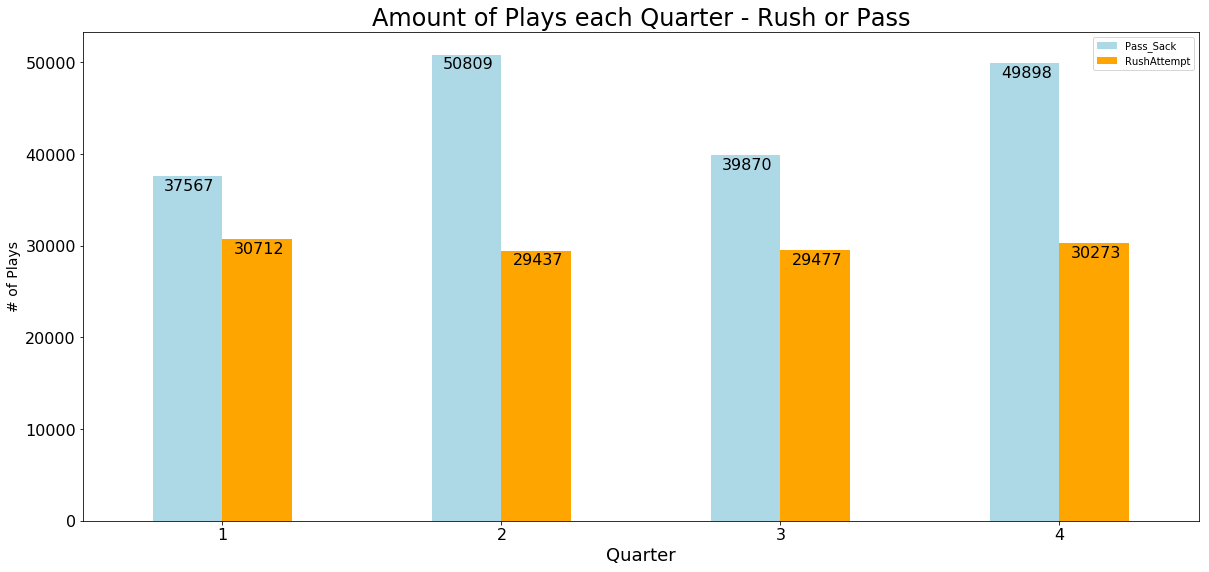

In [9]:
#Focus on non-overtime quarters
regulation_plays = df[df.qtr != 5]
ax = regulation_plays.groupby(['qtr'])['Pass_Sack','RushAttempt'].sum().plot.bar(figsize=(20,9),color=['lightblue','orange'],rot=0,fontsize=16)
ax.set_title("Amount of Plays each Quarter - Rush or Pass", fontsize=24)
ax.set_xlabel("Quarter", fontsize=18)
ax.set_ylabel("# of Plays", fontsize=14)
ax.set_alpha(0.8)

# set individual bar lables using above list
for i in ax.patches:
    # get_x: width; get_height: verticle
    ax.text(i.get_x()+.04, i.get_height()-1500, str(round((i.get_height()), 2)), fontsize=16, color='black',rotation=0)

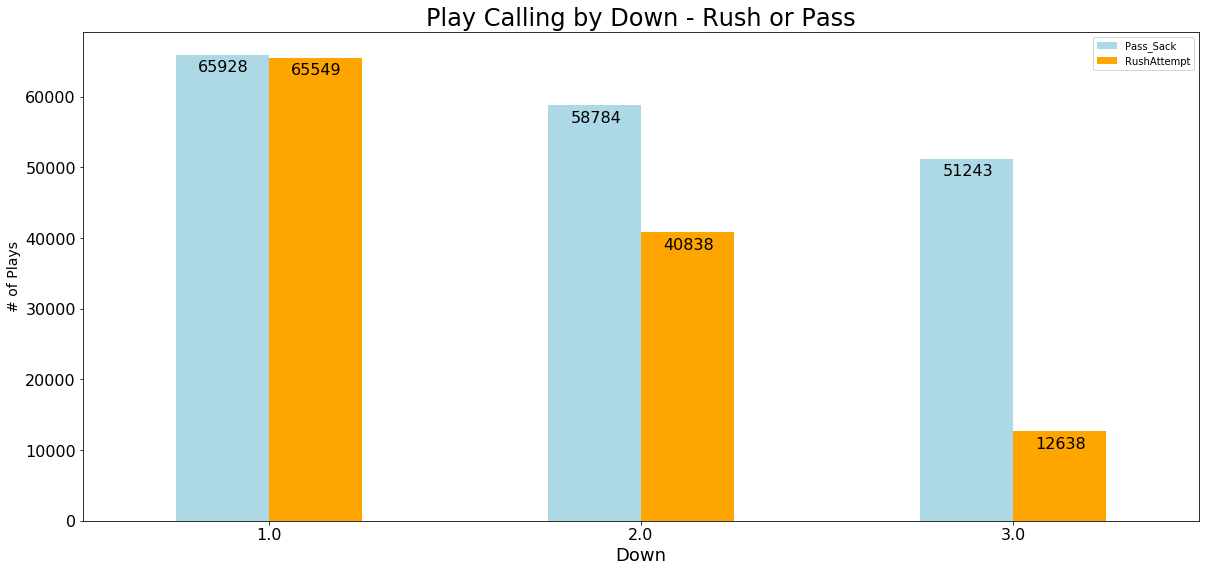

In [10]:
plays_down = df[df.down <= 3]
ax = plays_down.groupby(['down'])['Pass_Sack','RushAttempt'].sum().plot.bar(figsize=(20,9),color=['lightblue','orange'],rot=0,fontsize=16)
ax.set_title("Play Calling by Down - Rush or Pass", fontsize=24)
ax.set_xlabel("Down", fontsize=18)
ax.set_ylabel("# of Plays", fontsize=14)
ax.set_alpha(0.8)

# set individual bar lables using above list
for i in ax.patches:
    # get_x: width; get_height: verticle
    ax.text(i.get_x()+.06, i.get_height()-2400, str(round((i.get_height()), 2)), fontsize=16, color='black',rotation=0)

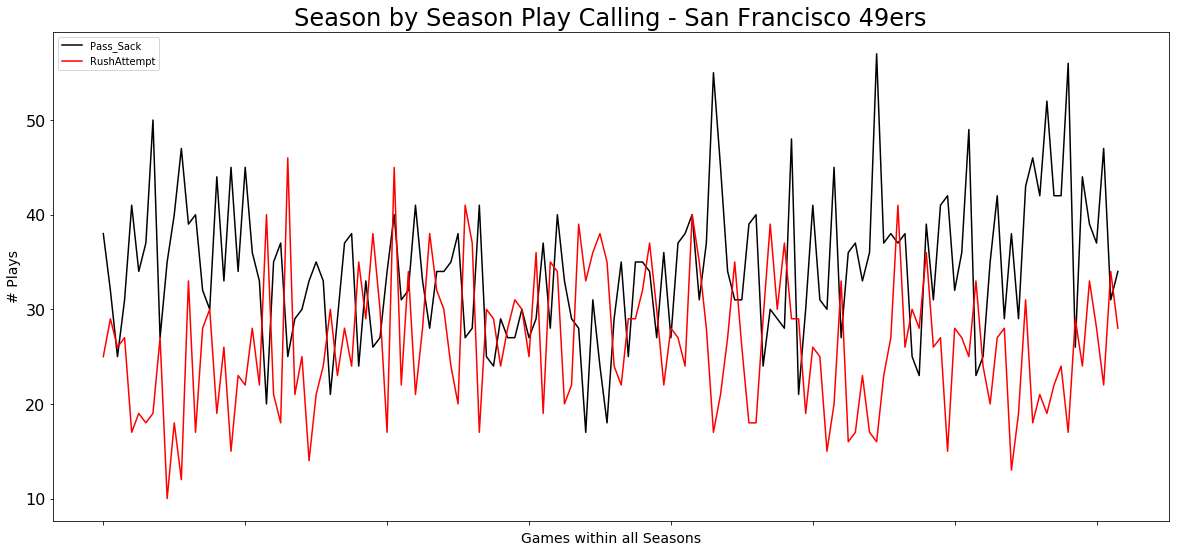

In [11]:
plays_down = df[(df.down <= 3) & (df.qtr != 5) & (df.posteam == 'SF')]
ax = plays_down.groupby(['Season','GameID'])['Pass_Sack','RushAttempt'].sum().plot.line(color=['black','red'],figsize=(20,9),rot=0,fontsize=16)
ax.set_title("Season by Season Play Calling - San Francisco 49ers", fontsize=24)
ax.set_ylabel("# Plays", fontsize=14)
ax.set_xlabel("Games within all Seasons", fontsize=14)
ax.set_alpha(0.8)

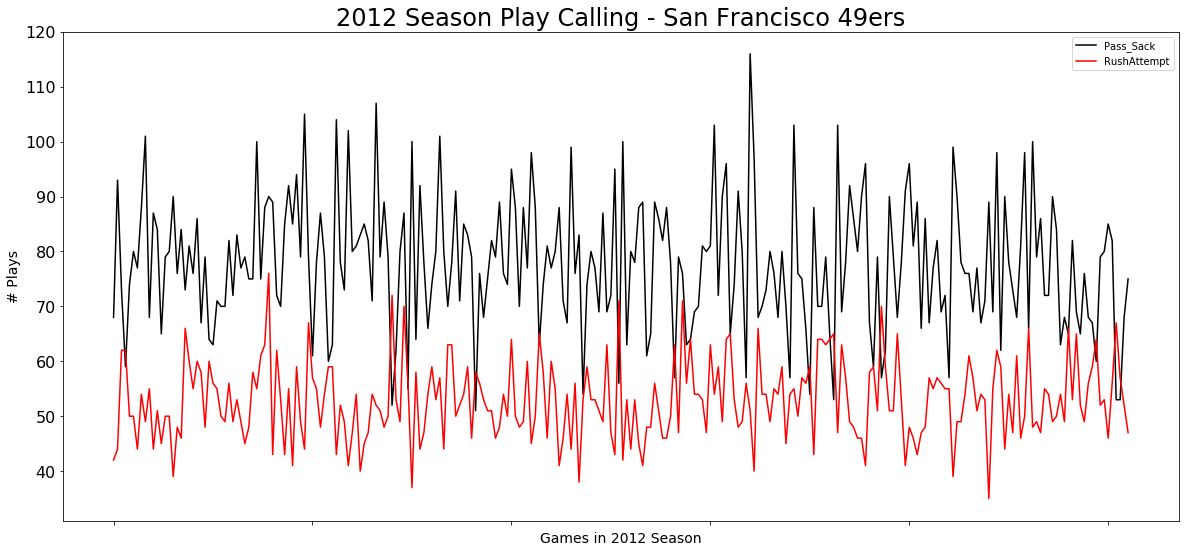

In [12]:
#year the 49ers went to superbowl
df12 = df[df.Season == 2012]
ax = df12.groupby(['Season','GameID'])['Pass_Sack','RushAttempt'].sum().plot.line(color=['black','red'],figsize=(20,9),rot=0,fontsize=16)
ax.set_title("2012 Season Play Calling - San Francisco 49ers", fontsize=24)
ax.set_ylabel("# Plays", fontsize=14)
ax.set_xlabel("Games in 2012 Season", fontsize=14)
ax.set_alpha(0.8)

In [13]:
df3 = df[df.down==3] 
df3.PlayType.value_counts() #Count of plays 

Pass          44229
Run           12638
No Play        5555
Sack           4200
QB Kneel        504
Field Goal      222
Spike            35
Timeout           8
Punt              5
Half End          1
Kickoff           1
Name: PlayType, dtype: int64

Text(0.5,1,'Count of Play Types on 3rd Down')

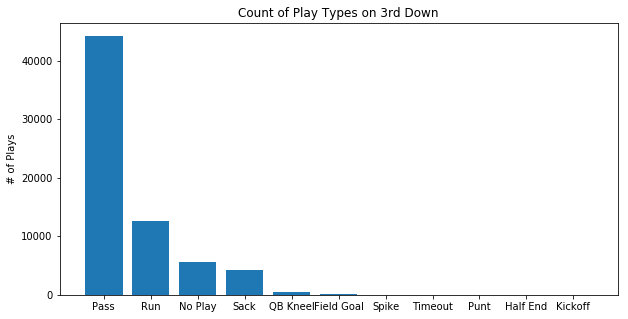

In [14]:
playtypes = pd.DataFrame(df3.PlayType.value_counts())
playtypes = playtypes.reset_index()
plt.figure(figsize=(10,5))
plt.bar(playtypes['index'], playtypes.PlayType)
plt.ylabel('# of Plays')
plt.title('Count of Play Types on 3rd Down')

In [15]:
# Get average results for offensive plays by game for model
# to preserve the dataframe's shape (with GameID being unique), I'm going to use a split-apply-merge strategy

# Split - from origional DF: Get 2 DF's for plays that are labeled Run or Pass
r_off_agg = df3[(df3.PlayType == 'Run')]
p_off_agg = df3[(df3.PlayType == 'Pass')|(df3.PlayType == 'Sack')]

# Apply - groupby aggregation to find the Median yards by game, team, PlayType, and qtr
r_off_agg = r_off_agg.groupby(['GameID','qtr','posteam'])['Yards.Gained'].mean().reset_index()
p_off_agg = p_off_agg.groupby(['GameID','qtr','posteam'])['Yards.Gained'].mean().reset_index()

r_off_agg = r_off_agg.rename(columns={'Yards.Gained':'RushingMean'}) # Rename the columns for clarity
p_off_agg = p_off_agg.rename(columns={'Yards.Gained':'PassingMean'})

# Merge - Combine the Away and Home averages into one dataframe
off_agg = pd.merge(r_off_agg,
                 p_off_agg,
                 left_on=['GameID','qtr','posteam'],
                 right_on=['GameID','qtr','posteam'],
                 how='outer')

off_agg.head()

,GameID,qtr,posteam,RushingMean,PassingMean
0,2009091000,1,TEN,-2.0,4.0
1,2009091000,3,PIT,0.0,4.0
2,2009091000,3,TEN,-2.0,8.0
3,2009091000,4,PIT,0.0,15.0
4,2009091000,4,TEN,0.0,1.5


In [16]:
off_tendencies = df3[df3.PlayType.notna()&
              (df3.PlayType != 'No Play')&
              (df3.PlayType != 'Kickoff')&
              (df3.PlayType != 'Extra Point')&
              (df3.PlayType != 'End of Game')&
              (df3.PlayType != 'Quarter End')&
              (df3.PlayType != 'Half End')&
              (df3.PlayType != 'Two Minute Warning')&
              (df3.PlayType != 'Field Goal')&
              (df3.PlayType != 'Punt') &
              (df.PlayAttempted == 1)]

# Moving average by team, quarter, and season. This is a rolling average to consider recent decisions to compensate for coaching changes
off_tendencies = off_tendencies.groupby(['GameID','posteam','Season','qtr'])['Pass_Sack','RushAttempt'].sum().reset_index()
off_tendencies['PassingWA']=off_tendencies.groupby(['posteam','qtr','Season']).Pass_Sack.apply(lambda x: x.shift().rolling(8,min_periods=1).mean().fillna(x))
off_tendencies['RushingWA']=off_tendencies.groupby(['posteam','qtr','Season']).RushAttempt.apply(lambda x: x.shift().rolling(8,min_periods=1).mean().fillna(x))
off_tendencies = off_tendencies.drop(columns=['Pass_Sack', 'RushAttempt'])
off_tendencies[(off_tendencies.posteam == 'SF')&(off_tendencies.qtr == 1)].head(20)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


,GameID,posteam,Season,qtr,PassingWA,RushingWA
83,2009091309,SF,2009,1,3.000000,0.000000
210,2009092010,SF,2009,1,3.000000,0.000000
290,2009092704,SF,2009,1,3.000000,0.000000
470,2009100411,SF,2009,1,3.000000,0.333333
564,2009101108,SF,2009,1,3.000000,0.250000
743,2009102502,SF,2009,1,3.000000,0.400000
879,2009110106,SF,2009,1,3.000000,0.333333
1011,2009110810,SF,2009,1,2.857143,0.285714
1039,2009111200,SF,2009,1,2.750000,0.375000
1191,2009112203,SF,2009,1,2.750000,0.375000


In [17]:
# take the dataframe for plays above and define particular columns we want
play_attr = ['PlayAttempted','GameID','qtr','TimeSecs','yrdline100','ydstogo','Drive','down','PlayType','GoalToGo',
             'TimeUnder','PlayTimeDiff','PassAttempt','RushAttempt','posteam','DefensiveTeam','PosTeamScore',
             'DefTeamScore','Season','HomeTimeouts_Remaining_Pre','AwayTimeouts_Remaining_Pre','No_Score_Prob',
             'Opp_Field_Goal_Prob','Opp_Safety_Prob','Win_Prob','HomeTeam','ExpPts']
plays = df3[play_attr]

# filter out the records that we wont use to predict run or pass
plays = plays[plays.PlayType.notna()&
              (plays.PlayType != 'No Play')&
              (plays.PlayType != 'Kickoff')&
              (plays.PlayType != 'Extra Point')&
              (plays.PlayType != 'End of Game')&
              (plays.PlayType != 'Quarter End')&
              (plays.PlayType != 'Half End')&
              (plays.PlayType != 'Two Minute Warning')&
              (plays.PlayType != 'Field Goal')&
              (plays.PlayType != 'Punt')]

# assure that there was a play attempted to filter out penalties before the play occured.
plays = plays[plays.PlayAttempted == 1]

# add data regarding offensive stats
plays = pd.merge(plays,
                off_agg,
                left_on=['GameID','qtr','posteam'],
                right_on=['GameID','qtr','posteam'],
                how='left')

# merge data for moving average play calling tendencies
plays = pd.merge(plays,
                off_tendencies,
                left_on=['GameID','qtr','posteam','Season'],
                right_on=['GameID','qtr','posteam','Season'],
                how='left')

plays = plays.rename(columns = {'posteam':'Team'})

#plays = plays[(plays['Team'] == 'SF')]
plays.head(5)
plays.columns

Index(['PlayAttempted', 'GameID', 'qtr', 'TimeSecs', 'yrdline100', 'ydstogo',
       'Drive', 'down', 'PlayType', 'GoalToGo', 'TimeUnder', 'PlayTimeDiff',
       'PassAttempt', 'RushAttempt', 'Team', 'DefensiveTeam', 'PosTeamScore',
       'DefTeamScore', 'Season', 'HomeTimeouts_Remaining_Pre',
       'AwayTimeouts_Remaining_Pre', 'No_Score_Prob', 'Opp_Field_Goal_Prob',
       'Opp_Safety_Prob', 'Win_Prob', 'HomeTeam', 'ExpPts', 'RushingMean',
       'PassingMean', 'PassingWA', 'RushingWA'],
      dtype='object')

In [18]:
plays['ScoreDiff'] = plays['PosTeamScore'] - plays['DefTeamScore']

In [19]:
plays.describe()

,PlayAttempted,GameID,qtr,TimeSecs,yrdline100,ydstogo,Drive,down,GoalToGo,TimeUnder,...,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Win_Prob,ExpPts,RushingMean,PassingMean,PassingWA,RushingWA,ScoreDiff
count,61614.0,6.161400e+04,61614.000000,61614.000000,61614.000000,61614.000000,61614.000000,61614.0,61614.000000,61614.000000,...,61614.000000,61614.000000,61614.000000,61614.000000,61614.000000,33729.000000,60642.000000,61614.000000,61614.000000,61614.000000
mean,1.0,2.013135e+09,2.566965,1715.385367,51.157675,7.195426,12.036112,3.0,0.052845,7.576395,...,0.139790,0.113029,0.002818,0.503411,1.388058,4.622066,5.902121,2.663597,0.695271,-0.913575
std,0.0,2.576713e+06,1.135399,1059.698958,24.648433,5.035675,7.149428,0.0,0.223726,4.426080,...,0.198600,0.072497,0.003589,0.285098,1.738107,5.806775,6.658770,0.721715,0.494151,10.662957
min,1.0,2.009091e+09,1.000000,-895.000000,1.000000,1.000000,1.000000,3.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-3.278221,-34.000000,-20.000000,0.000000,0.000000,-59.000000
25%,1.0,2.011100e+09,2.000000,796.000000,32.000000,3.000000,6.000000,3.0,0.000000,4.000000,...,0.005971,0.049920,0.000289,0.283834,0.052209,1.000000,1.500000,2.250000,0.375000,-7.000000
50%,1.0,2.013110e+09,3.000000,1751.000000,55.000000,6.000000,12.000000,3.0,0.000000,7.000000,...,0.039431,0.102101,0.001347,0.504702,1.364527,3.000000,5.000000,2.625000,0.625000,0.000000
75%,1.0,2.015121e+09,4.000000,2624.000000,72.000000,10.000000,18.000000,3.0,0.000000,11.000000,...,0.204654,0.169008,0.004111,0.723478,2.773521,6.000000,9.000000,3.000000,1.000000,4.000000
max,1.0,2.017123e+09,5.000000,3593.000000,99.000000,50.000000,35.000000,3.0,1.000000,15.000000,...,1.000000,0.309619,0.025106,1.000000,5.684286,75.000000,90.000000,8.000000,4.000000,59.000000


In [20]:
plays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61614 entries, 0 to 61613
Data columns (total 32 columns):
PlayAttempted                 61614 non-null int64
GameID                        61614 non-null int64
qtr                           61614 non-null int64
TimeSecs                      61614 non-null float64
yrdline100                    61614 non-null float64
ydstogo                       61614 non-null int64
Drive                         61614 non-null int64
down                          61614 non-null float64
PlayType                      61614 non-null object
GoalToGo                      61614 non-null float64
TimeUnder                     61614 non-null int64
PlayTimeDiff                  61612 non-null float64
PassAttempt                   61614 non-null int64
RushAttempt                   61614 non-null int64
Team                          61614 non-null object
DefensiveTeam                 61614 non-null object
PosTeamScore                  61614 non-null float64
DefTeamSc

# Models

In [21]:
plays.TimeSecs = plays.TimeSecs.fillna(0).astype(int)
plays.yrdline100 = plays.yrdline100.fillna(0).astype(int)
plays.down = plays.down.fillna(0).astype(int)
plays.PosTeamScore = plays.PosTeamScore.fillna(0).astype(int)
plays.DefTeamScore = plays.DefTeamScore.fillna(0).astype(int)
plays.RushingMean = plays.RushingMean.fillna(0).astype(int)
plays.PassingMean = plays.PassingMean.fillna(0).astype(int)
plays.ScoreDiff = plays.ScoreDiff.fillna(0).astype(int)
plays.PlayTimeDiff = plays.PlayTimeDiff.fillna(0).astype(int)
plays.GoalToGo = plays.GoalToGo.fillna(0).astype(int)

In [22]:
plays = plays[(plays.PassAttempt == 1)|(plays.RushAttempt == 1)]
plays['PlayType'] = plays.apply(lambda x: 1 if x.PassAttempt == 1 else 0, axis=1)
plays.PlayType = plays.PlayType.fillna(0).astype(int)


# changing float64 to float32
plays.No_Score_Prob = plays.No_Score_Prob.fillna(0).astype(np.float32)
plays.Opp_Field_Goal_Prob = plays.Opp_Field_Goal_Prob.fillna(0).astype(np.float32)
plays.Opp_Safety_Prob = plays.Opp_Safety_Prob.fillna(0).astype(np.float32)
plays.Win_Prob = plays.Win_Prob.fillna(0).astype(np.float32)
plays.ExpPts = plays.ExpPts.fillna(0).astype(np.float32)

In [23]:
model_plays = ['PlayAttempted','GameID','qtr','TimeSecs','yrdline100','ydstogo','Drive','down','PlayType','GoalToGo',
             'TimeUnder','PlayTimeDiff','PassAttempt','RushAttempt','PosTeamScore',
             'DefTeamScore','Season','HomeTimeouts_Remaining_Pre','AwayTimeouts_Remaining_Pre','No_Score_Prob',
             'Opp_Field_Goal_Prob','Opp_Safety_Prob','Win_Prob','ExpPts']

In [24]:
plays_predictors = ['ydstogo','down','ScoreDiff','No_Score_Prob',
                    'Drive','Season','TimeSecs','TimeUnder','PlayTimeDiff','Opp_Field_Goal_Prob']
X = plays[plays_predictors]
#X = plays[model_plays]

#X = X.drop(columns = ['PlayType'])
y = plays.PlayType
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.20, random_state = 27)

In [25]:
dtc = DecisionTreeClassifier()
dtc.fit(train_X, train_y)

dt_predictions = dtc.predict(val_X)

false_positive_rate, true_positive_rate, thresholds = roc_curve(val_y, dt_predictions)
dt_roc_auc = auc(false_positive_rate, true_positive_rate)

In [26]:
# Random Forest Classification
rf = RandomForestClassifier()
rf.fit(train_X, train_y)

rf_predictions = rf.predict(val_X)

false_positive_rate, true_positive_rate, thresholds = roc_curve(val_y, rf_predictions)
rf_roc_auc = auc(false_positive_rate, true_positive_rate)


In [27]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(train_X, train_y)

lr_predictions = log_reg.predict(val_X)

false_positive_rate, true_positive_rate, thresholds = roc_curve(val_y, lr_predictions)
lr_roc_auc = auc(false_positive_rate, true_positive_rate)

In [28]:
# KNN Clustering
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_X, train_y)

knn_predictions = knn.predict(val_X)

false_positive_rate, true_positive_rate, thresholds = roc_curve(val_y, knn_predictions)
knn_roc_auc = auc(false_positive_rate, true_positive_rate)

In [29]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(train_X, train_y)

gnb_predictions = gnb.predict(val_X)

false_positive_rate, true_positive_rate, thresholds = roc_curve(val_y, gnb_predictions)
gnb_roc_auc = auc(false_positive_rate, true_positive_rate)

In [30]:
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Logistic Regression', 'KNN',
              'Naive Bayes'],
    'AUC': [dt_roc_auc, rf_roc_auc, lr_roc_auc, knn_roc_auc, gnb_roc_auc]})
result_df = results.sort_values(by='AUC', ascending=False)
result_df = result_df.set_index('AUC')
result_df.head(7)

,Model
AUC,
0.715423,Random Forest
0.652643,Decision Tree
0.593314,KNN
0.558398,Naive Bayes
0.519682,Logistic Regression


# Closer look at Best Model - Random Forest

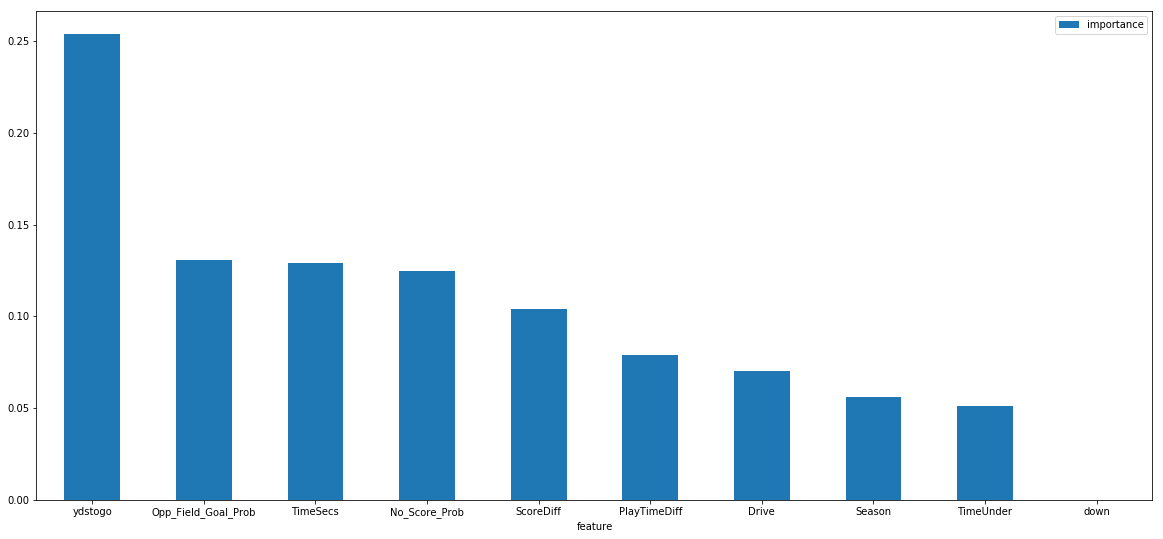

In [31]:
importances = pd.DataFrame({'feature':train_X.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar(figsize=(20,9), rot=0)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 27)

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7191455678029905

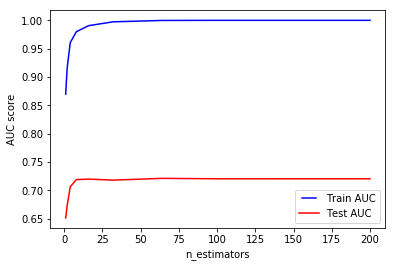

In [33]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

train_results = []
test_results = []
for estimator in n_estimators:
    model = RandomForestClassifier(n_estimators=estimator)
    model.fit(x_train, y_train)

    train_pred = model.predict(x_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    y_pred = model.predict(x_test)


    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

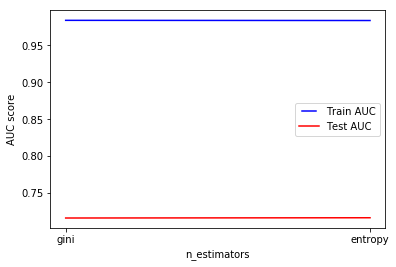

In [34]:
criterions = ['gini', 'entropy']

train_results = []
test_results = []
for crit in criterions:
    model = RandomForestClassifier(criterion=crit)
    model.fit(x_train, y_train)

    train_pred = model.predict(x_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    y_pred = model.predict(x_test)


    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(criterions, train_results, 'b', label="Train AUC")
line2, = plt.plot(criterions, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

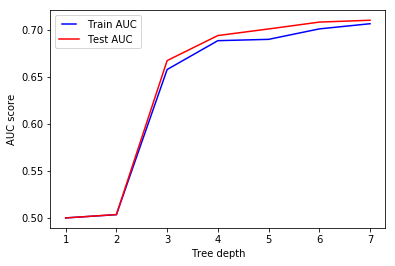

In [35]:
max_depths = np.linspace(1, 7, 7, endpoint=True)

train_results = []
test_results = []
for max_depth in max_depths:
    model = RandomForestClassifier(max_depth=max_depth)
    model.fit(x_train, y_train)

    train_pred = model.predict(x_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    y_pred = model.predict(x_test)


    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

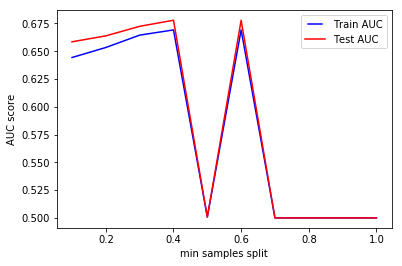

In [36]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    model = RandomForestClassifier(min_samples_split=min_samples_split)
    model.fit(x_train, y_train)

    train_pred = model.predict(x_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    y_pred = model.predict(x_test)


    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()


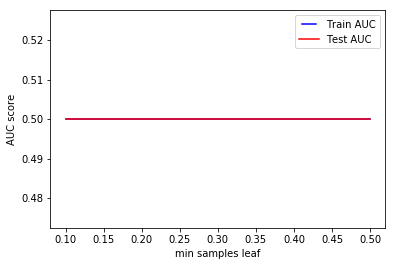

In [37]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    model = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    model.fit(x_train, y_train)

    train_pred = model.predict(x_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    y_pred = model.predict(x_test)


    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

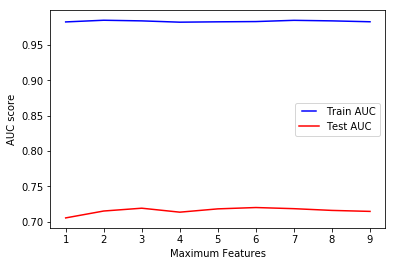

In [38]:
max_features = list(range(1,X.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    model = RandomForestClassifier(max_features=max_feature)
    model.fit(x_train, y_train)

    train_pred = model.predict(x_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    y_pred = model.predict(x_test)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Maximum Features')
plt.show()